# Creating a tube along a trefoil knot
# - using Matplotlib, NumPy and scikit-vectors

Copyright (c) 2017-2019 Tor Olav Kristensen, http://subcube.com

https://github.com/t-o-k/scikit-vectors

Use of this source code is governed by a BSD-license that can be found in the LICENSE file.

In [1]:
# This example has been tested with NumPy v1.15.3, Matplotlib v2.1.1. and Jupyter v4.4.0

In [2]:
# Uncomment one of these to get a Matplotlib backend with interactive plots 

# %matplotlib auto
# %matplotlib notebook

In [3]:
# Get the necessary libraries

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

from skvectors import create_class_Cartesian_3D_Vector

In [4]:
# Size and resolution for Matplotlib figures

figure_size = (8, 6)
figure_dpi = 100

In [5]:
# The functions for the trefoil knot curve

def f_x(t):

    return +np.cos(t) + 2 * np.cos(2 * t)


def f_y(t):

    return +np.sin(t) - 2 * np.sin(2 * t)


def f_z(t):

    return +2 * np.sin(3 * t)

In [6]:
# The first derivatives of the functions for the curve

def d1_f_x(t):

    return -np.sin(t) - 4 * np.sin(2 * t)


def d1_f_y(t):

    return +np.cos(t) - 4 * np.cos(2 * t)


def d1_f_z(t):

    return +6 * np.cos(3 * t)

In [7]:
# The second derivatives of the functions for the curve

def d2_f_x(t):

    return -np.cos(t) - 8 * np.cos(2 * t)


def d2_f_y(t):

    return -np.sin(t) + 8 * np.sin(2 * t)


def d2_f_z(t):

    return -18 * np.sin(3 * t)

In [8]:
# Resolutions for plot

nr_of_points_along_curve = 3 * 2**5 + 1
nr_of_points_across_curve = 3 * 2**2 + 1

In [9]:
# Necessary NumPy functions

np_functions = \
    {
        'not': np.logical_not,
        'and': np.logical_and,
        'or': np.logical_or,
        'all': np.all,
        'any': np.any,
        'min': np.minimum,
        'max': np.maximum,
        'abs': np.absolute,
        'trunc': np.trunc,
        'ceil': np.ceil,
        'copysign': np.copysign,
        'log10': np.log10,
        'cos': np.cos,
        'sin': np.sin,
        'atan2': np.arctan2,
        'pi': np.pi
    }

In [10]:
# Make a vector class that can hold all the points along the curve

NP_3D_A1 = \
    create_class_Cartesian_3D_Vector(
        name = 'NP_3D_A1',
        component_names = [ 'x', 'y', 'z' ],
        brackets = '<>',
        sep = ', ',
        cnull = np.zeros(nr_of_points_along_curve),
        cunit = np.ones(nr_of_points_along_curve),
        functions = np_functions
    )

In [11]:
# Calculate the points along the curve

angles_along_curve = np.linspace(-np.pi, +np.pi, nr_of_points_along_curve, endpoint=True)

p_o = \
    NP_3D_A1(
        x = f_x(angles_along_curve),
        y = f_y(angles_along_curve),
        z = f_z(angles_along_curve)
    )

In [12]:
# Vectors from the first derivatives at the points along the curve

v_d1 = \
    NP_3D_A1(
        x = d1_f_x(angles_along_curve),
        y = d1_f_y(angles_along_curve),
        z = d1_f_z(angles_along_curve)
    )

In [13]:
# Vectors from the second derivatives at the points along the curve

v_d2 = \
    NP_3D_A1(
        x = d2_f_x(angles_along_curve),
        y = d2_f_y(angles_along_curve),
        z = d2_f_z(angles_along_curve)
    )

In [14]:
# Calculate the vectors for all the Frenet frames along the curve

# Tangent vectors at the points along the curve
v_t = v_d1.normalize()

# Binormal vectors at the points along the curve
v_b = v_d1.cross(v_d2).normalize()

# Normal vectors at the points along the curve
v_n = v_t.cross(v_b)

In [15]:
# For all the points along the curve, calculate points in a circle across the curve

angles_across_curve = np.linspace(-np.pi, +np.pi, nr_of_points_across_curve, endpoint=True)

tube_radius = 0.3

surface_points = \
    [
        p_o + v_n.axis_rotate(v_t, angle) * tube_radius
#         p_o + v_n.axis_rotate(v_t, angle) * tube_radius * (3 + np.sin(2 * angle)) / 2
        for angle in angles_across_curve
    ]

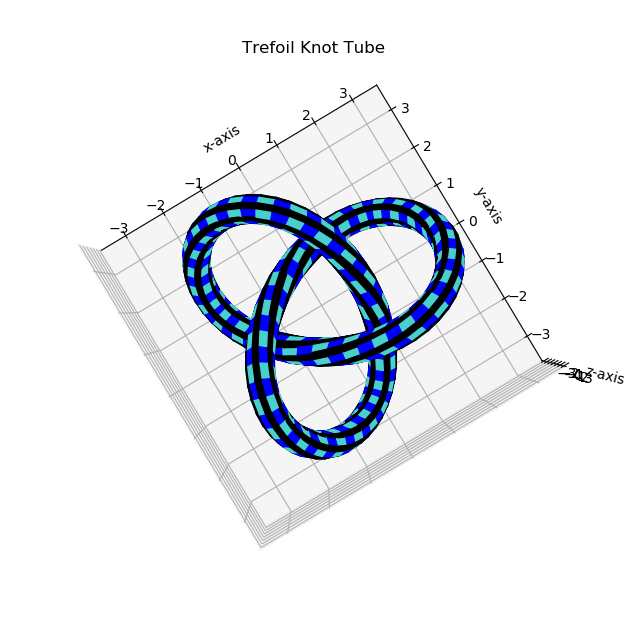

In [16]:
# Show the trefoil knot tube

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_aspect(1)
ax.set_title('Trefoil Knot Tube')
for j in range(nr_of_points_along_curve-1):
    for i in range(nr_of_points_across_curve-1):
        if i % 2 == 0:
            color = 'black'
        else:
            if j % 2 == 0:
                color = 'blue'
            else:
                color = 'mediumturquoise'
        x0, y0, z0 = surface_points[i  ]
        x1, y1, z1 = surface_points[i+1]
        p00 = (x0[j  ], y0[j  ], z0[j  ])
        p01 = (x0[j+1], y0[j+1], z0[j+1])
        p10 = (x1[j  ], y1[j  ], z1[j  ])
        p11 = (x1[j+1], y1[j+1], z1[j+1])
        triangle_a = Poly3DCollection([ [ p00, p10, p11 ] ])
        triangle_a.set_color(color)
        triangle_a.set_edgecolor(color)
        ax.add_collection3d(triangle_a)
        triangle_b = Poly3DCollection([ [ p11, p01, p00 ] ])
        triangle_b.set_color(color)
        triangle_b.set_edgecolor(color)
        ax.add_collection3d(triangle_b)
ax.set_xlim(-3.5, +3.5)
ax.set_ylim(-3.5, +3.5)
ax.set_zlim(-3.5, +3.5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=90, azim=-120)

plt.show()

In [17]:
# Now do it in another way

In [18]:
# Make a vector class that can hold all the points on the surface of the tube

surface_shape = (nr_of_points_across_curve, nr_of_points_along_curve)
zeros = np.zeros(surface_shape)
ones = np.ones(surface_shape)

NP_3D_A2 = \
    create_class_Cartesian_3D_Vector(
        name = 'NP_3D_A2',
        component_names = [ 'xx', 'yy', 'zz' ],
        brackets = [ '<< ', ' >>' ],
        sep = ', ',
        cnull = zeros,
        cunit = ones,
        functions = np_functions
    )

In [19]:
# Verify that NumPy's array broadcasting works as needed

A1_cunit = NP_3D_A1.component_unit()
A2_cunit = NP_3D_A2.component_unit()

assert (A2_cunit * A1_cunit).shape == surface_shape

In [20]:
# Initialize position vectors for the points
# (The 1D arrays are beeing broadcasted to 2D arrays)

pp_o = \
    NP_3D_A2(
        xx = p_o.x,
        yy = p_o.y,
        zz = p_o.z
    )

In [21]:
# Alternative ways to do the same

# pp_o = \
#     NP_3D_A2(
#         xx = A2_cunit * p_o.x,
#         yy = A2_cunit * p_o.y,
#         zz = A2_cunit * p_o.z
#     )

# tile_size = (nr_of_points_across_curve, 1)
# pp_o = \
#     NP_3D_A2(
#         xx = np.tile(p_o.x, tile_size),
#         yy = np.tile(p_o.y, tile_size),
#         zz = np.tile(p_o.z, tile_size)
#     )

In [22]:
 # Initialize tangent, binormal and normal vectors

vv_t = NP_3D_A2(xx=v_t.x, yy=v_t.y, zz=v_t.z)
vv_b = NP_3D_A2(xx=v_b.x, yy=v_b.y, zz=v_b.z)
vv_n = NP_3D_A2(xx=v_n.x, yy=v_n.y, zz=v_n.z)

In [23]:
# Set up 2D arrays for angles along and across the curve

angles_along, angles_across = np.meshgrid(angles_along_curve, angles_across_curve)

In [24]:
# Calculate all the vectors along and across the curve towards the surface of the tube

vv_s = vv_n.axis_rotate(vv_t, angles_across)

In [25]:
# Prepare some variables for plotting

no_labels = [ ]
no_ticks = [ ]

pi_labels = [ '-π', '', '-π/2', '', '0', '', '+π/2', '', '+π' ]
pi_ticks = \
    [
        n / 4 * np.pi
        for n in [ -4, -3, -2, -1, 0, +1, +2, +3, +4 ]
    ]

vector_length = 0.5

stride_along = 2
stride_across = 1

sl_along = slice(None, None, stride_along)
sl_across = slice(None, None, stride_across)
sl = (sl_across, sl_along)

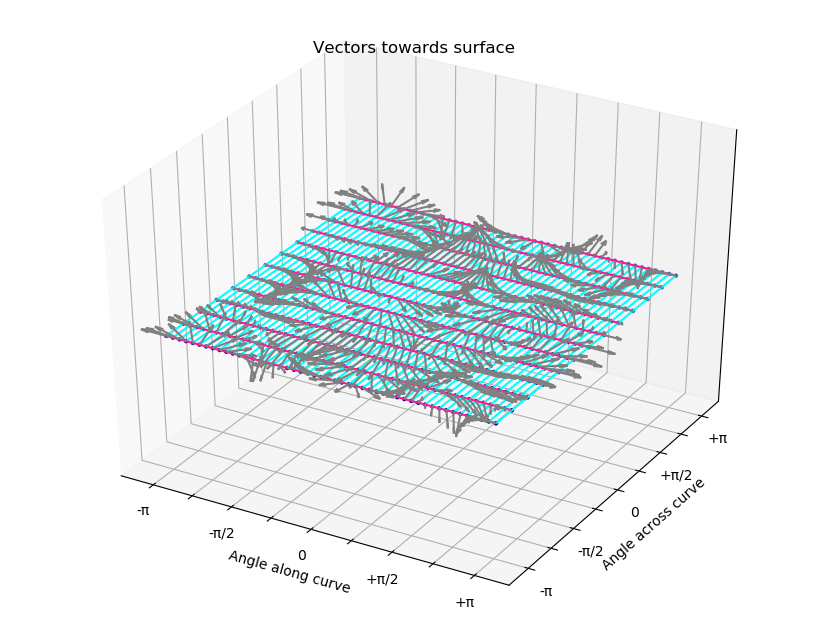

In [26]:
# Show some of the vectors calculated above

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Vectors towards surface')
ax.scatter(
    angles_along[sl], angles_across[sl], zeros[sl],
    color = 'darkblue',
    marker = '.',
    edgecolors = 'face'
)
ax.plot_wireframe(
    angles_along, angles_across, zeros,
    rstride = 0,
    cstride = stride_along,
    color = 'cyan'
)
ax.plot_wireframe(
    angles_along, angles_across, zeros,
    rstride = stride_across,
    cstride = 0,
    color = 'deeppink'
)
ax.quiver(
    angles_along[sl], angles_across[sl], zeros[sl],
    vv_s.xx[sl], vv_s.yy[sl], vv_s.zz[sl],
    length = vector_length,
    pivot = 'tail',
    color = 'gray'
)
ax.set_xlim(-np.pi-0.5, +np.pi+0.5)
ax.set_ylim(-np.pi-0.5, +np.pi+0.5)
ax.set_zlim(-np.pi-0.5, +np.pi+0.5)
ax.set_xlabel('Angle along curve')
ax.set_ylabel('Angle across curve')
ax.set_xticklabels(pi_labels)
ax.set_yticklabels(pi_labels)
ax.set_zticklabels(no_labels)
ax.set_xticks(pi_ticks)
ax.set_yticks(pi_ticks)
ax.set_zticks(no_ticks)
ax.view_init(elev=36, azim=-60)
plt.show()

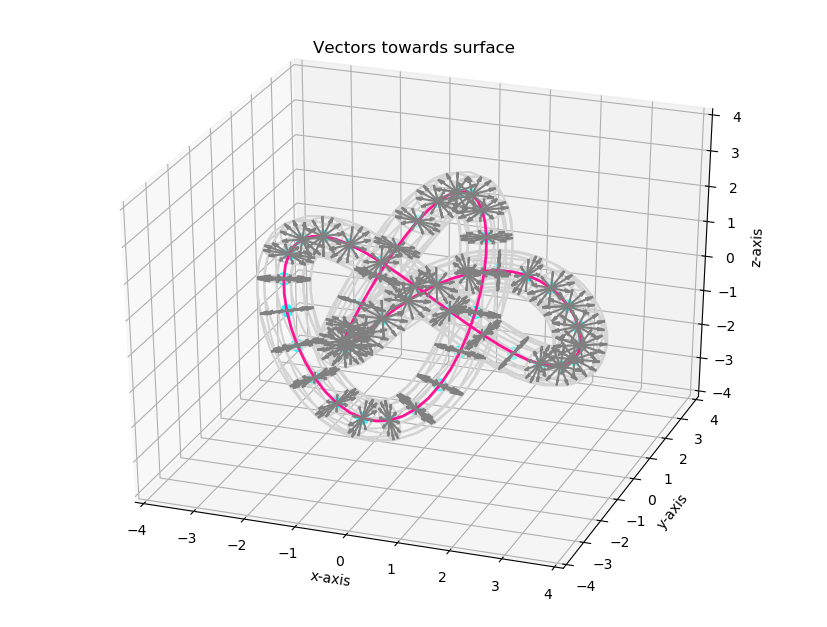

In [27]:
# Show some of the vectors calculated above

pp_w = pp_o + vv_s *vector_length

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Vectors towards surface')
ax.plot_wireframe(
    pp_w.xx, pp_w.yy, pp_w.zz,
    rstride = 0,
    cstride = stride_along,
    color = 'lightgray'
)
ax.plot(
    p_o.x, p_o.y, p_o.z,
    color = 'deeppink',
    linewidth = 2
)
ax.plot_wireframe(
    pp_w.xx, pp_w.yy, pp_w.zz,
    rstride = stride_across,
    cstride = 0,
    color = 'lightgray'
)
ax.quiver(
    pp_o.xx[sl], pp_o.yy[sl], pp_o.zz[sl],
    vv_s.xx[sl], vv_s.yy[sl], vv_s.zz[sl],
    length = vector_length,
    pivot = 'tail',
    color = 'gray'
)
ax.scatter(
    p_o.x[sl_along], p_o.y[sl_along], p_o.z[sl_along],
    color = 'cyan',
    marker = 'o',
    linewidth = 5
)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-4, +4)
ax.set_ylim(-4, +4)
ax.set_zlim(-4, +4)
ax.view_init(elev=30, azim=-70)
plt.show()

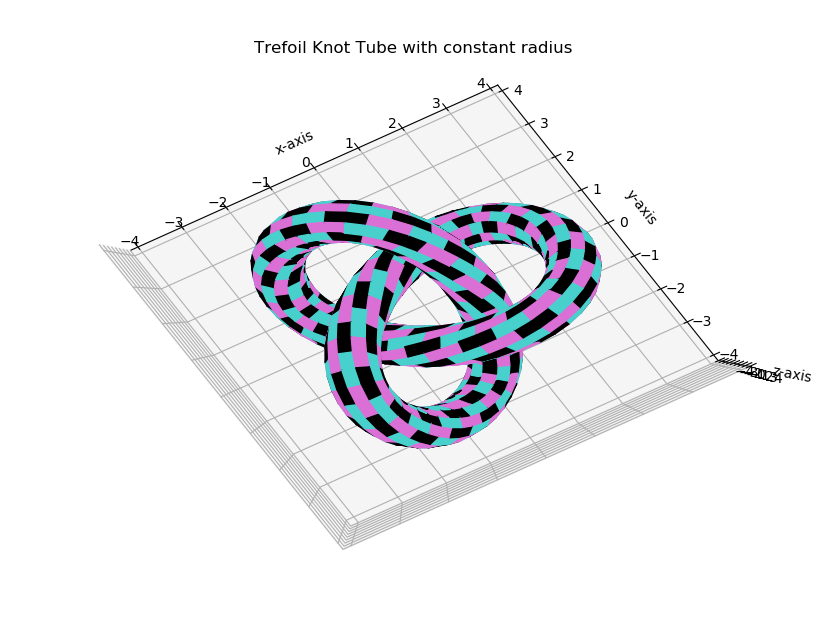

In [28]:
# Show the trefoil knot tube

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Trefoil Knot Tube with constant radius')
for j in range(nr_of_points_along_curve-1):
    for i in range(nr_of_points_across_curve-1):
        k = (3 * i + j) % 6
#         k = (2 * i + 3 * j) % 6
        if k < 2:
            color = 'mediumturquoise'
        elif k < 4:
            color = 'black'
        else:
            color = 'orchid'
        c00 = (i  , j  )
        c01 = (i  , j+1)
        c10 = (i+1, j  )
        c11 = (i+1, j+1)
        p00 = (pp_w.xx[c00], pp_w.yy[c00], pp_w.zz[c00])
        p01 = (pp_w.xx[c01], pp_w.yy[c01], pp_w.zz[c01])
        p10 = (pp_w.xx[c10], pp_w.yy[c10], pp_w.zz[c10])
        p11 = (pp_w.xx[c11], pp_w.yy[c11], pp_w.zz[c11])
        triangle_a = Poly3DCollection([ [ p00, p10, p11 ] ])
        triangle_a.set_color(color)
        triangle_a.set_edgecolor(color)
        ax.add_collection3d(triangle_a)
        triangle_b = Poly3DCollection([ [ p11, p01, p00 ] ])
        triangle_b.set_color(color)
        triangle_b.set_edgecolor(color)
        ax.add_collection3d(triangle_b)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-4, +4)
ax.set_ylim(-4, +4)
ax.set_zlim(-4, +4)
ax.view_init(elev=90, azim=-120)

plt.show()

In [29]:
# Calculate all the radii for the tube along and across the curve

rr = (4 + 2 * np.sin(2 * angles_across)) * (6 + 3 * np.cos(3 * angles_along)) / 90

assert rr.shape == surface_shape

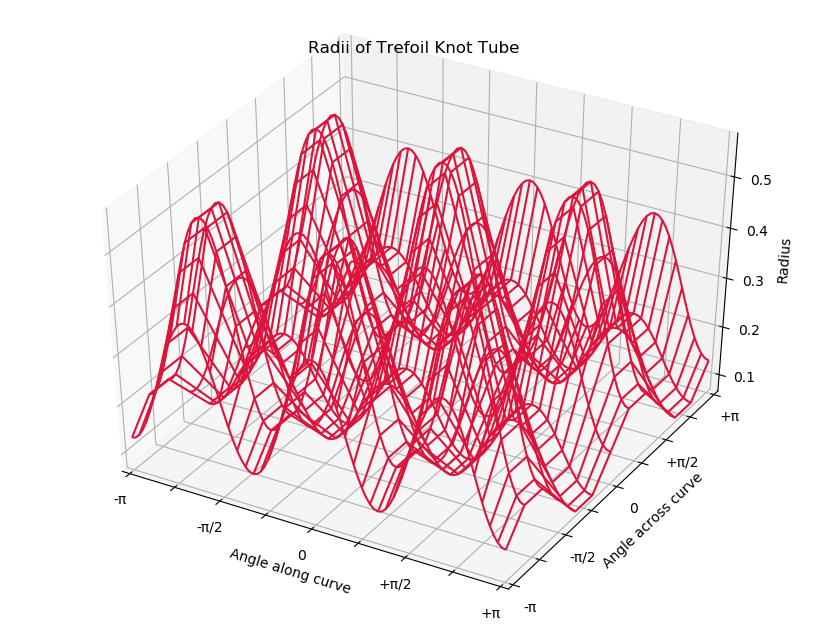

In [30]:
# Show the varying radii calculated above

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Radii of Trefoil Knot Tube')
ax.plot_wireframe(angles_along, angles_across, rr, color='crimson')
ax.set_xlabel('Angle along curve')
ax.set_ylabel('Angle across curve')
ax.set_zlabel('Radius')
ax.set_xlim(-np.pi, +np.pi)
ax.set_ylim(-np.pi, +np.pi)
ax.set_xticklabels(pi_labels)
ax.set_yticklabels(pi_labels)
ax.set_xticks(pi_ticks)
ax.set_yticks(pi_ticks)
ax.view_init(elev=40, azim=-60)
plt.show()

In [31]:
# Calculate all the position vectors for the points on the surface of the tube

pp_s = pp_o + vv_s * rr

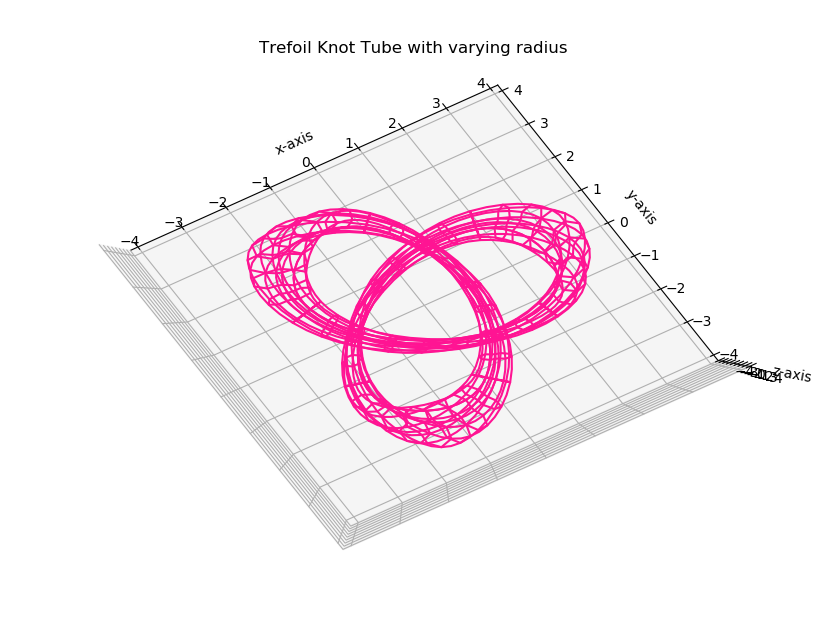

In [32]:
# Show the trefoil knot tube

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Trefoil Knot Tube with varying radius')
ax.plot_wireframe(*pp_s, color='deeppink')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-4, +4)
ax.set_ylim(-4, +4)
ax.set_zlim(-4, +4)
ax.view_init(elev=90, azim=-120)
plt.show()

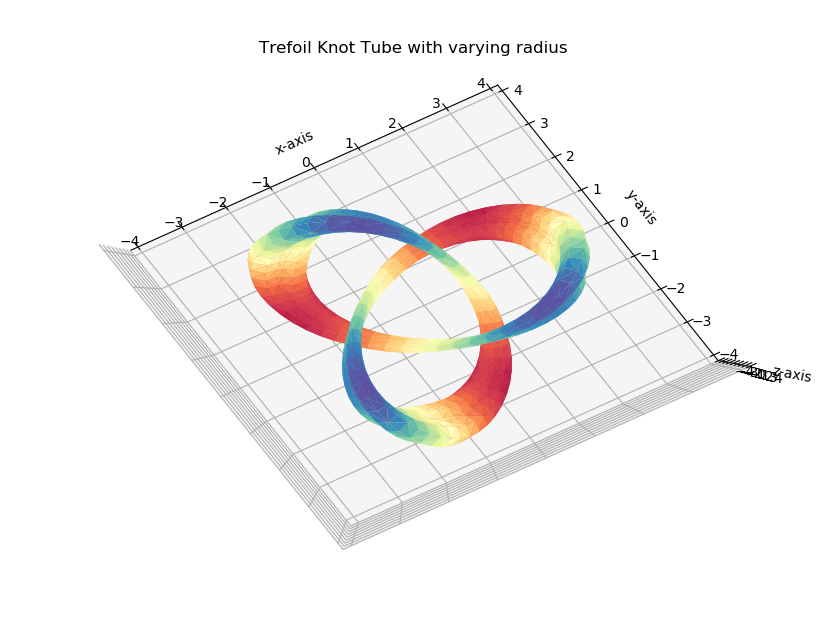

In [33]:
# Show the trefoil knot tube

tri = \
    mtri.Triangulation(
        angles_along.flatten(),
        angles_across.flatten()
    )

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Trefoil Knot Tube with varying radius')
ax.plot_trisurf(
    pp_s.xx.flatten(),
    pp_s.yy.flatten(),
    pp_s.zz.flatten(),
    triangles = tri.triangles,
    cmap = plt.cm.Spectral
)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-4, +4)
ax.set_ylim(-4, +4)
ax.set_zlim(-4, +4)
ax.view_init(elev=90, azim=-120)
plt.show()

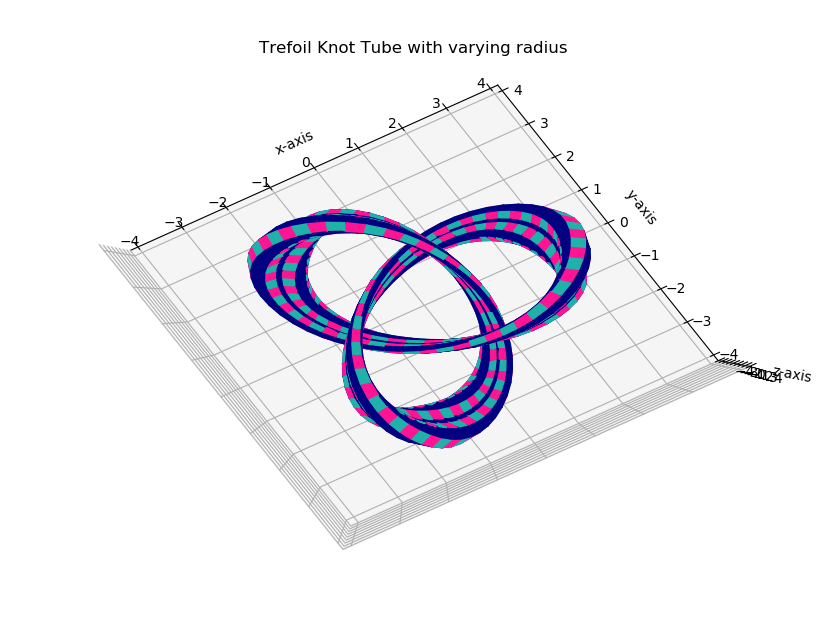

In [34]:
# Show the trefoil knot tube

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
ax = Axes3D(fig)
ax.set_title('Trefoil Knot Tube with varying radius')
for j in range(nr_of_points_along_curve-1):
    for i in range(nr_of_points_across_curve-1):
        if i%2 == 0:
#         if (i + j) % 2 == 0:
            color = 'navy'
        else:
            if j%2 == 0:
                color = 'lightseagreen'
            else:
                color = 'deeppink'
        p00 = pp_s(lambda cv: cv[i  , j  ])
        p01 = pp_s(lambda cv: cv[i  , j+1])
        p10 = pp_s(lambda cv: cv[i+1, j  ])
        p11 = pp_s(lambda cv: cv[i+1, j+1])
        triangle_a = Poly3DCollection([ [ p00, p10, p11 ] ])
        triangle_a.set_color(color)
        triangle_a.set_edgecolor(color)
        ax.add_collection3d(triangle_a)
        triangle_b = Poly3DCollection([ [ p11, p01, p00 ] ])
        triangle_b.set_color(color)
        triangle_b.set_edgecolor(color)
        ax.add_collection3d(triangle_b)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-4, +4)
ax.set_ylim(-4, +4)
ax.set_zlim(-4, +4)
ax.view_init(elev=90, azim=-120)
plt.show()